## imports and files

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List

# get an absolute path to the directory that contains parent files
__file__ = globals()['_dh'][0]
project_dir = __file__ = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)


In [2]:
series = 9
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))

## config map reader

In [3]:
def config_reader(csv_addr: str):
    config_path = os.path.join(
        series_path,
        csv_addr)
    key_config_df = pd.read_csv(config_path)
    return key_config_df
config_reader(config_key_mapper)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas
0,1,5-paper-video,yolo,yolov5n,4,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
1,2,5-paper-video,yolo,yolov5n,4,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
2,3,5-paper-video,yolo,yolov5n,8,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
3,4,5-paper-video,yolo,yolov5n,8,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
4,5,5-paper-video,yolo,yolov5n,16,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
5,6,5-paper-video,yolo,yolov5n,16,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
6,7,5-paper-video,yolo,yolov5n,32,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
7,8,5-paper-video,yolo,yolov5n,32,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
8,9,5-paper-video,yolo,yolov5s,4,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
9,10,5-paper-video,yolo,yolov5s,4,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1


In [18]:
def get_experiment_detail(experiment_id: int):
    path = os.path.join(
        series_path,        
        config_key_mapper
    )
    df = config_reader(config_key_mapper)
    return df[df["experiment_id"]==experiment_id]
get_experiment_detail(2)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas
1,2,5-paper-video,yolo,yolov5n,4,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1


In [19]:
key_config_df = config_reader(config_key_mapper)
key_config_df

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas
0,1,5-paper-video,yolo,yolov5n,4,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
1,2,5-paper-video,yolo,yolov5n,4,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
2,3,5-paper-video,yolo,yolov5n,8,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
3,4,5-paper-video,yolo,yolov5n,8,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
4,5,5-paper-video,yolo,yolov5n,16,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
5,6,5-paper-video,yolo,yolov5n,16,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
6,7,5-paper-video,yolo,yolov5n,32,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
7,8,5-paper-video,yolo,yolov5n,32,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
8,9,5-paper-video,yolo,yolov5s,4,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
9,10,5-paper-video,yolo,yolov5s,4,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1


In [20]:
def get_result_file_names(results_addr):
    files = []
    key_config = config_reader(config_key_mapper)
    experiments_keys = list(key_config["experiment_id"])
    for path in os.listdir(results_addr):
        if os.path.isfile(os.path.join(results_addr, path)):
            file_name = path.split(".")[0]
            try:
                if int(file_name) in experiments_keys:
                    files.append(path)
            except:
                pass
    return files
file_names = get_result_file_names(
    results_addr=series_path)
file_names

['38.json',
 '36.json',
 '6.json',
 '33.json',
 '11.json',
 '13.json',
 '9.json',
 '37.json',
 '21.json',
 '10.json',
 '25.json',
 '30.json',
 '29.json',
 '18.json',
 '4.json',
 '15.json',
 '20.json',
 '31.json',
 '8.json',
 '1.json',
 '19.json',
 '3.json',
 '28.json',
 '27.json',
 '22.json',
 '32.json',
 '23.json',
 '7.json',
 '17.json',
 '40.json',
 '5.json',
 '35.json',
 '2.json',
 '14.json',
 '26.json',
 '24.json',
 '12.json',
 '16.json',
 '39.json',
 '34.json']

## Read resutls

In [21]:
def read_results(
    results_addr, return_type = "all", specific_file = None):
    files = get_result_file_names(results_addr=results_addr)
    
    if return_type == "all":
        return_results = {}
        for file in files:
            name = file.split(".")[0].split("/")[-1]
            full_path = os.path.join(
                results_addr, file
            )
            json_file = open(full_path)
            return_results[name] = json.load(json_file)
        return return_results

            
results = read_results(
    results_addr=series_path)
print(results.keys())


dict_keys(['38', '36', '6', '33', '11', '13', '9', '37', '21', '10', '25', '30', '29', '18', '4', '15', '20', '31', '8', '1', '19', '3', '28', '27', '22', '32', '23', '7', '17', '40', '5', '35', '2', '14', '26', '24', '12', '16', '39', '34'])


In [8]:
def flatten_results(per_second_latencies):
    """
    change the results format from
    [[second_1], [second_2], ...]
    to:
    [req_1, req_2, ...]
    """
    flattend_results = []
    for second_results in per_second_latencies:
        for request_result in second_results:
            flattend_results.append(request_result)
    return flattend_results
flattened_results = flatten_results(results['1']['responses'])
len(flattened_results)

60

In [22]:
def latency_calculator(results):
    client_to_server_latencies = []
    model_latencies = []
    model_to_server_latencies = []
    latencies = {
        'client_to_server_latencies': [],
        'model_latencies': [],
        'model_to_server_latencies': [] 
    }
    timeout_count = 0
    for result in results:
        try:
            # outer times
            outter_times = result[
                'timing'] if 'timing' in result.keys() else result['time']
            sending_time = outter_times["sending_time"]
            arrival_time = outter_times["arrival_time"]
            # inner times
            data = result['outputs'][0]['data']
            data = json.loads(data[0])
            inner_times = data["time"]
            model_name = result['model_name']

            # TEMP to be fixed with a consistent time format
            # inner_times = inner_times[model_name + '_times'][0]

            arrival_key = "arrival_" + model_name
            serve_key   = "serving_" + model_name
            model_arrival_time = inner_times[arrival_key]
            model_serving_time = inner_times[serve_key]
            # all three latencies
            client_to_server_latency =\
                model_arrival_time - sending_time
            model_latency =\
                model_serving_time - model_arrival_time
            model_to_server_latency =\
                arrival_time - model_serving_time
            client_to_server_latencies.append(client_to_server_latency)
            model_latencies.append(model_latency)
            model_to_server_latencies.append(model_to_server_latency)
            latencies = {
                'client_to_server_latencies': client_to_server_latencies,
                'model_latencies': model_latencies,
                'model_to_server_latencies': model_to_server_latencies
            }
        except KeyError:
            timeout_count += 1
    return latencies, timeout_count
experiment_id = 1 
latencies, timeout_count = latency_calculator(
    flatten_results(results[str(experiment_id)]['responses']))
print(f'{timeout_count=}')
print(pd.DataFrame(latencies))

timeout_count=1
    client_to_server_latencies  model_latencies  model_to_server_latencies
0                     1.488229         1.500975                   6.018730
1                     3.713187         0.763113                   4.911515
2                     5.102148         1.095810                   3.626051
3                     6.606086         0.736375                   9.909289
4                     8.217225         0.876978                   7.114421
5                     9.472257         0.908740                   8.310548
6                    10.300579         0.631445                   8.456515
7                    11.371942         0.864234                  20.679560
8                    11.737488         0.631420                  21.538104
9                    12.438964         0.660100                  20.644422
10                   14.501246         0.650832                  21.626309
11                   14.553343         0.919372                  24.485925
12       

In [10]:
def metric_summary(metric, values):
    summary = {}
    if values != []:
        summary[f'{metric}_avg'] = np.average(values)
        summary[f'{metric}_p99'] = np.percentile(values, 99)
        summary[f'{metric}_p50'] = np.percentile(values, 50)
        summary[f'{metric}_var'] = np.var(values)
        summary[f'{metric}_max'] = max(values)
        summary[f'{metric}_min'] = min(values)
    else:
        summary[f'{metric}_avg'] = None
        summary[f'{metric}_p99'] = None
        summary[f'{metric}_p50'] = None
        summary[f'{metric}_var'] = None
        summary[f'{metric}_max'] = None
        summary[f'{metric}_min'] = None
    return summary

def latency_summary(latencies):
    summary = {}
    for metric_name, values in latencies.items():
        summary.update(
            metric_summary(
                metric=metric_name, values=values))
    return summary

summary = latency_summary(latencies=latencies)
pd.DataFrame(list(summary.items()))


,0,1
0,client_to_server_latencies_avg,28.978324
1,client_to_server_latencies_p99,48.769516
2,client_to_server_latencies_p50,31.012224
3,client_to_server_latencies_var,174.617904
4,client_to_server_latencies_max,49.272879
5,client_to_server_latencies_min,1.488229
6,model_latencies_avg,0.706152
7,model_latencies_p99,1.280459
8,model_latencies_p50,0.663856
9,model_latencies_var,0.034965


In [23]:
def result_processing():
    results = read_results(results_addr=series_path)            
    final_dataframe = []
    for experiment_id, result in results.items():
        processed_exp = {'experiment_id': int(experiment_id)}
        latencies, timeout_count = latency_calculator(
            flatten_results(results[str(experiment_id)]['responses']))
        latencies = latency_summary(latencies)
        processed_exp.update(latencies)
        processed_exp['start_time'] = time.ctime(
            result['start_time_experiment'])
        processed_exp['end_time'] = time.ctime(
            result['end_time_experiment'])
        processed_exp['duration'] = round(
            result['end_time_experiment'] - result['start_time_experiment'])
        processed_exp['timeout_count'] = timeout_count
        skipped_metrics = [
            'time_cpu_usage_count',
            'time_cpu_usage_rate',
            'time_cpu_throttled_count',
            'time_cpu_throttled_rate',
            'time_memory_usage',
            'time_throughput',
            'responses',
            'start_time_experiment',
            'end_time_experiment'   
        ]
        for metric, values in result.items():
            if metric in skipped_metrics:
                continue
            processed_exp.update(metric_summary(metric=metric, values=values))
        final_dataframe.append(processed_exp)
    return pd.DataFrame(final_dataframe)
results = result_processing()
print(results)
results.columns

    experiment_id  client_to_server_latencies_avg  \
0              38                       13.719109   
1              36                       36.103970   
2               6                        8.862712   
3              33                      145.290046   
4              11                       12.599040   
5              13                        8.398937   
6               9                       35.594531   
7              37                       14.115293   
8              21                        8.806020   
9              10                       33.991822   
10             25                       99.063056   
11             30                       12.052230   
12             29                       13.301227   
13             18                       50.276086   
14              4                       11.787713   
15             15                        8.193031   
16             20                       16.016851   
17             31                       10.074

Index(['experiment_id', 'client_to_server_latencies_avg',
       'client_to_server_latencies_p99', 'client_to_server_latencies_p50',
       'client_to_server_latencies_var', 'client_to_server_latencies_max',
       'client_to_server_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_server_latencies_avg', 'model_to_server_latencies_p99',
       'model_to_server_latencies_p50', 'model_to_server_latencies_var',
       'model_to_server_latencies_max', 'model_to_server_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttle

In [24]:
key_config_df = config_reader(config_key_mapper)
selected_key_config_df =  key_config_df[key_config_df['model_variant'] == 'yolov5n']
selected_key_config_df

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas
0,1,5-paper-video,yolo,yolov5n,4,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
1,2,5-paper-video,yolo,yolov5n,4,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
2,3,5-paper-video,yolo,yolov5n,8,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
3,4,5-paper-video,yolo,yolov5n,8,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
4,5,5-paper-video,yolo,yolov5n,16,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
5,6,5-paper-video,yolo,yolov5n,16,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
6,7,5-paper-video,yolo,yolov5n,32,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1
7,8,5-paper-video,yolo,yolov5n,32,40Gi,1,1,1,60,9,"repeat of 7, \n cpu type: Intel(R) Xeon(R) Gol...",1


In [25]:
from importlib.metadata import metadata


def table_maker(
    experiment_ids: List[int],
    metadata_columns, results_columns):
    # extract full data
    results = result_processing()
    metadata = config_reader(config_key_mapper)
    # retrieve rows
    selected_results = results[results['experiment_id'].isin(experiment_ids)]
    selected_metadata = metadata[metadata['experiment_id'].isin(experiment_ids)]
    a = 1
    pass

experiment_ids = np.arange(1, 16).tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg']
table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)


,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5n,4,40Gi,1.280459,147.187640,0.706152
1,yolov5n,4,40Gi,1.051915,476.397809,0.654445
2,yolov5n,8,40Gi,0.399499,107.849214,0.166365
3,yolov5n,8,40Gi,0.259798,344.746224,0.142815
4,yolov5n,16,40Gi,0.119132,78.718748,0.092500
5,yolov5n,16,40Gi,0.127367,275.374511,0.091959
6,yolov5n,32,40Gi,0.120195,75.818358,0.092271
7,yolov5n,32,40Gi,0.101772,276.963845,0.089293
8,yolov5s,4,40Gi,1.740355,207.672431,1.076355
9,yolov5s,4,40Gi,1.345965,616.058483,0.999929


<AxesSubplot: xlabel='cpu_request'>

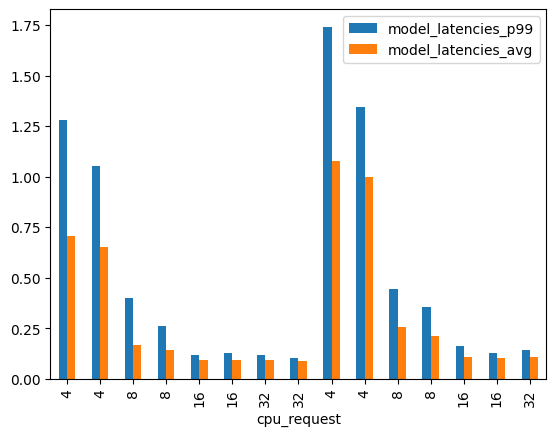

In [26]:
def table_maker(
    experiment_ids: List[int],
    metadata_columns, results_columns):
    # extract full data
    results = result_processing()
    metadata = config_reader(config_key_mapper)
    # retrieve rows
    selected_results = results[results['experiment_id'].isin(experiment_ids)]
    selected_metadata = metadata[metadata['experiment_id'].isin(experiment_ids)]
    merged_results = selected_metadata.merge(selected_results)
    columns = metadata_columns + results_columns
    output = merged_results[columns]
    return output

experiment_ids = np.arange(1, 16).tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])


<AxesSubplot: xlabel='cpu_request'>

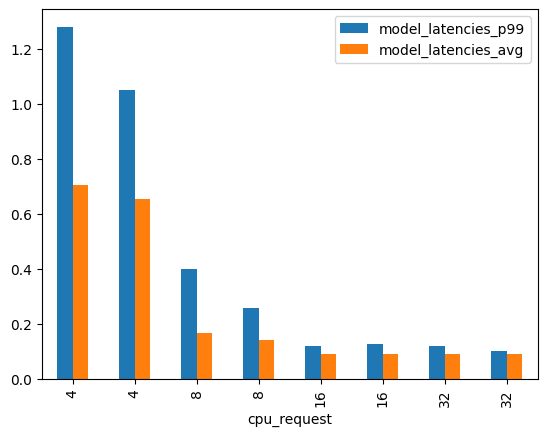

In [30]:
# resnet 5n
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5n']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

<AxesSubplot: xlabel='cpu_request'>

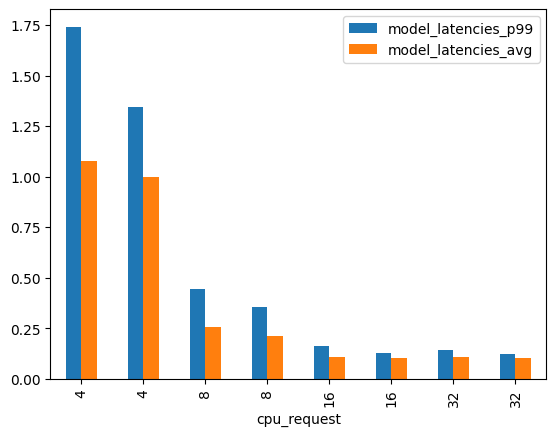

In [31]:
# resnet 5s
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5s']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

<AxesSubplot: xlabel='cpu_request'>

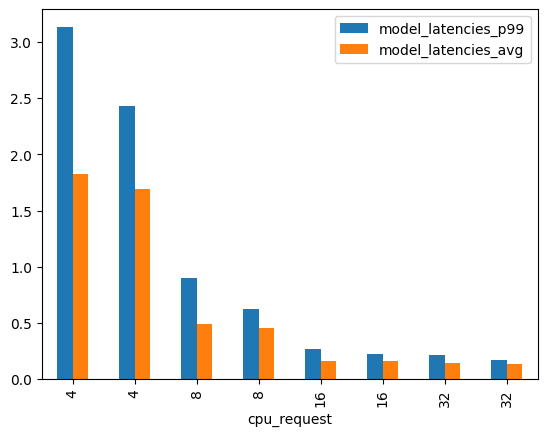

In [33]:
# yolov5m
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5m']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

<AxesSubplot: xlabel='cpu_request'>

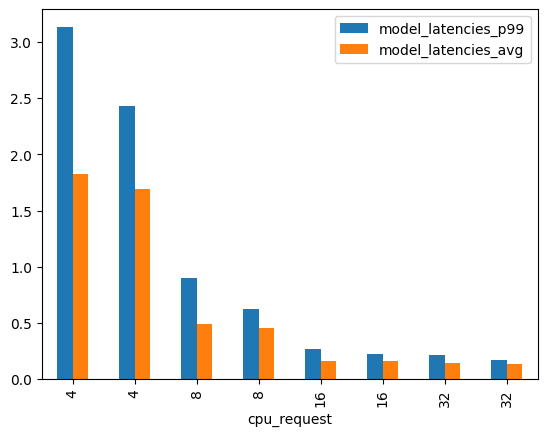

In [34]:
# yolov5l
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5m']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

<AxesSubplot: xlabel='cpu_request'>

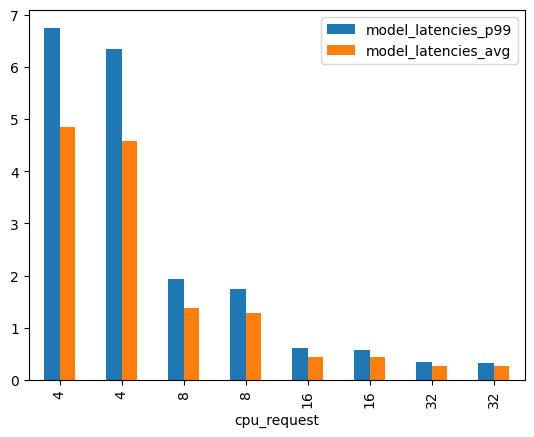

In [35]:
# yolov5x
experiment_ids = key_config_df[
    key_config_df['model_variant'] == 'yolov5x']['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
output.plot.bar(x='cpu_request', y=['model_latencies_p99', 'model_latencies_avg'])

,model_variant,cpu_request,memory_request,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg
0,yolov5n,4,40Gi,1.280459,147.187640,0.706152
1,yolov5n,4,40Gi,1.051915,476.397809,0.654445
2,yolov5s,4,40Gi,1.740355,207.672431,1.076355
3,yolov5s,4,40Gi,1.345965,616.058483,0.999929
4,yolov5m,4,40Gi,3.134969,312.521735,1.826445
5,yolov5m,4,40Gi,2.429610,890.354848,1.696065
6,yolov5l,4,40Gi,4.897667,591.653271,3.284612
7,yolov5l,4,40Gi,4.246319,1510.785671,3.074649
8,yolov5x,4,40Gi,6.747281,835.496368,4.840108
9,yolov5x,4,40Gi,6.338735,2119.145713,4.583296


<AxesSubplot: xlabel='model_variant'>

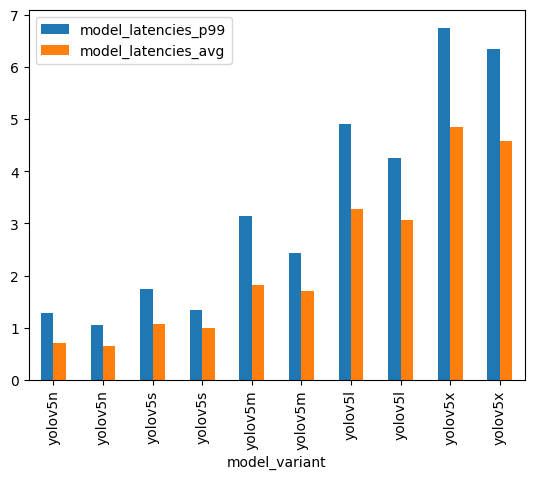

In [36]:
experiment_ids = key_config_df[
    key_config_df['cpu_request'] == 4]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'cpu_request', 'memory_request']
results_columns = ['model_latencies_p99', 'cpu_usage_count_avg', 'model_latencies_avg']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
output.plot.bar(x='model_variant', y=['model_latencies_p99', 'model_latencies_avg'])

,model_variant,memory_usage_max
0,yolov5n,1.995764e+09
1,yolov5n,1.977598e+09
2,yolov5s,2.294649e+09
3,yolov5s,2.429428e+09
4,yolov5m,2.702655e+09
5,yolov5m,2.538136e+09


<AxesSubplot: xlabel='model_variant'>

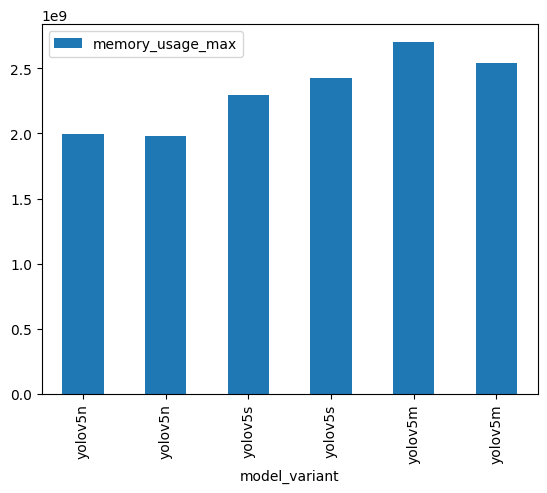

In [ ]:
experiment_ids = key_config_df[
    key_config_df['cpu_request'] == 4]['experiment_id'].tolist()
metadata_columns = ['model_variant']
results_columns = ['memory_usage_max']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
output.plot.bar(x='model_variant', y=['memory_usage_max'])

,model_variant,memory_usage_var
0,resnet18,8.973661e+14
1,resnet18,2.096975e+12
2,resnet18,6.137809e+10
3,resnet34,4.991969e+14
4,resnet34,4.075607e+11
5,resnet34,3.933297e+11
6,resnet50,2.349805e+15
7,resnet50,2.836609e+13
8,resnet50,8.974376e+12
9,resnet101,3.043291e+14


<AxesSubplot: xlabel='model_variant'>

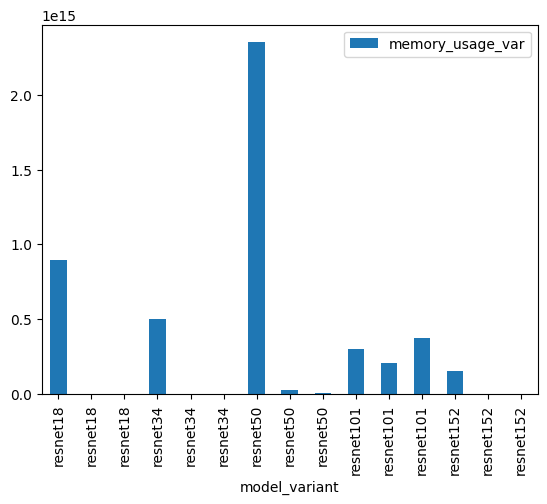

In [ ]:
experiment_ids = key_config_df[
    key_config_df['cpu_request'] == 1]['experiment_id'].tolist()
metadata_columns = ['model_variant']
results_columns = ['memory_usage_var']
output = table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
output.plot.bar(x='model_variant', y=['memory_usage_var'])